neuron_count = 16

t_size = 0.1

Epoch 1/50
443/443 - 1s - loss: 2.1047 - accuracy: 0.2849 - val_loss: 1.8930 - val_accuracy: 0.3892 - 1s/epoch - 2ms/step
Epoch 2/50
443/443 - 0s - loss: 1.7628 - accuracy: 0.3962 - val_loss: 1.6375 - val_accuracy: 0.4362 - 483ms/epoch - 1ms/step
Epoch 3/50
443/443 - 0s - loss: 1.5409 - accuracy: 0.4509 - val_loss: 1.4356 - val_accuracy: 0.5276 - 455ms/epoch - 1ms/step
Epoch 4/50
443/443 - 0s - loss: 1.3496 - accuracy: 0.5744 - val_loss: 1.2635 - val_accuracy: 0.6110 - 446ms/epoch - 1ms/step
Epoch 5/50
443/443 - 0s - loss: 1.1980 - accuracy: 0.6328 - val_loss: 1.1381 - val_accuracy: 0.6465 - 481ms/epoch - 1ms/step
Epoch 6/50
443/443 - 0s - loss: 1.0914 - accuracy: 0.6555 - val_loss: 1.0515 - val_accuracy: 0.6590 - 420ms/epoch - 949us/step
Epoch 7/50
443/443 - 0s - loss: 1.0165 - accuracy: 0.6689 - val_loss: 0.9881 - val_accuracy: 0.6721 - 445ms/epoch - 1ms/step
Epoch 8/50
443/443 - 0s - loss: 0.9613 - accuracy: 0.6800 - val_loss: 0.9404 - val_accuracy: 

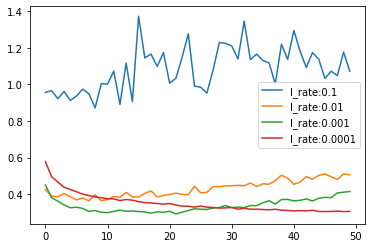

Epoch 1/10
190/190 [==============================] - 1s 6ms/step - loss: 23.2490 - accuracy: 0.6308 - val_loss: 10.6378 - val_accuracy: 0.7313
Epoch 2/10
190/190 [==============================] - 1s 5ms/step - loss: 8.3131 - accuracy: 0.7653 - val_loss: 8.1122 - val_accuracy: 0.7565
Epoch 3/10
190/190 [==============================] - 1s 5ms/step - loss: 6.4422 - accuracy: 0.7907 - val_loss: 6.7844 - val_accuracy: 0.7843
Epoch 4/10
190/190 [==============================] - 1s 5ms/step - loss: 5.3939 - accuracy: 0.8073 - val_loss: 6.1349 - val_accuracy: 0.7963
Epoch 5/10
190/190 [==============================] - 1s 5ms/step - loss: 4.7087 - accuracy: 0.8149 - val_loss: 5.7737 - val_accuracy: 0.7946
Epoch 6/10
190/190 [==============================] - 1s 5ms/step - loss: 4.1845 - accuracy: 0.8250 - val_loss: 5.1839 - val_accuracy: 0.8093
Epoch 7/10
190/190 [==============================] - 1s 5ms/step - loss: 3.7330 - accuracy: 0.8322 - val_loss: 4.7373 - val_accuracy: 0.8133
Epoc

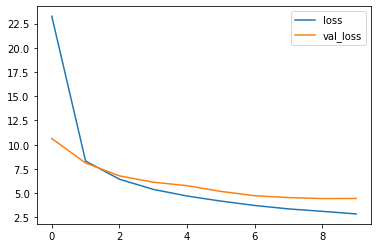

neuron_count = 16 

Epoch 1/10
222/222 [==============================] - 1s 2ms/step - loss: 1.8776 - accuracy: 0.3785 - val_loss: 1.4395 - val_accuracy: 0.5613
Epoch 2/10
222/222 [==============================] - 0s 2ms/step - loss: 1.2042 - accuracy: 0.6460 - val_loss: 1.0185 - val_accuracy: 0.6841
Epoch 3/10
222/222 [==============================] - 0s 2ms/step - loss: 0.9225 - accuracy: 0.7104 - val_loss: 0.8491 - val_accuracy: 0.7244
Epoch 4/10
222/222 [==============================] - 0s 2ms/step - loss: 0.7989 - accuracy: 0.7390 - val_loss: 0.7615 - val_accuracy: 0.7516
Epoch 5/10
222/222 [==============================] - 0s 2ms/step - loss: 0.7272 - accuracy: 0.7607 - val_loss: 0.7041 - val_accuracy: 0.7690
Epoch 6/10
222/222 [==============================] - 0s 2ms/step - loss: 0.6779 - accuracy: 0.7762 - val_loss: 0.6652 - val_accuracy: 0.7795
Epoch 7/10
222/222 [==============================] - 0s 2ms/step - loss: 0.6415 - accuracy: 0.7898 - val_loss: 0.6304 - val_acc

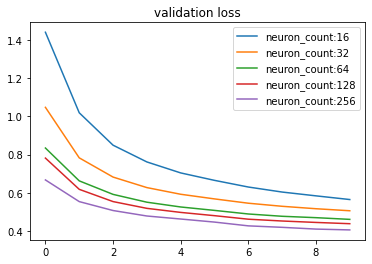

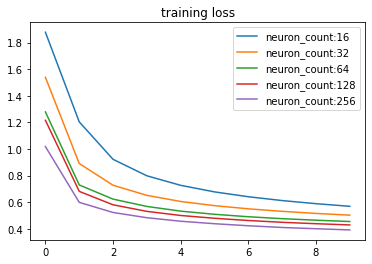

In [1]:
#!/usr/bin/env python
# coding: utf-8

# #Imports

# In[1]:


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split


# In[2]:


fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

all_data_images = np.concatenate((train_images, test_images), axis=0)
all_data_images = all_data_images / 255
all_data_labels = np.concatenate((train_labels, test_labels), axis=0)


# #Random seed

# In[3]:


import random
np.random.seed(0)
random.seed(0)
tf.random.set_seed(0)


# #Parameters

# In[4]:


hidden_layers = [16, 32, 64, 128, 256]
test_sizes = [0.1, 0.3, 0.5]
optimizers = [Adam, RMSprop, Adagrad]
learning_rates = [0.1, 0.01, 0.001, 0.0001]
best_outcomes = {"train_acc" : {} , "train_loss" : {} , "validation_acc" : {} , "validation_loss" : {} , "test_acc" : {} , "test_loss" : {}}


# #Different neuron counts and test sizes

# In[6]:


def get_model(n, test_percentage, optimizer, lr, all_data_images, all_data_labels):
    X_train, X_test, y_train, y_test = train_test_split(all_data_images, all_data_labels, test_size=test_percentage, random_state=0)
    model = tf.keras.Sequential([
                              Flatten(),
                              Dense(n,activation='relu'),
                              Dense(10,activation='softmax')

    ])

    model.compile(optimizer = optimizer(learning_rate=lr),
                  loss = keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy']
                  )
    history = model.fit(X_train, y_train,epochs=50,verbose=2,batch_size=128,validation_split=test_percentage)
    return history, model


# In[9]:


for neuron_count in hidden_layers:
  for t_size in test_sizes:
    print(f"neuron_count = {neuron_count}\n")
    print(f"t_size = {t_size}\n")
    history, model = get_model(neuron_count, t_size, SGD, 0.001, all_data_images, all_data_labels)
    
    best_outcomes["train_acc"][(neuron_count, t_size)] = history.history['accuracy'][-1] 
    best_outcomes["train_loss"][(neuron_count, t_size)] = history.history['loss'][-1] 
    best_outcomes["validation_acc"][(neuron_count, t_size)] = history.history['val_accuracy'][-1] 
    best_outcomes["validation_loss"][(neuron_count, t_size)] = history.history['val_loss'][-1] 
    best_outcomes["test_loss"][(neuron_count, t_size)] = model.evaluate(test_images, test_labels)[0] 
    best_outcomes["test_acc"][(neuron_count, t_size)] = model.evaluate(test_images, test_labels)[1]


# In[10]:



best_train_acc = max([(key,value) for key, value in best_outcomes["train_acc"].items()],key=lambda x : x[1])
best_test_acc = max([(key,value) for key, value in best_outcomes["test_acc"].items()],key=lambda x : x[1])
print(f"best train accuracy : {best_train_acc} and best test accuracy : {best_test_acc}")


# In[12]:


best_test_size = 0.1
best_neuron_count = 256


# In[18]:


best_optimizer = []
i = 0
for optimizer in optimizers:
  best_optimizer.append({})
  history, model = get_model(best_neuron_count, best_test_size, optimizer, 0.001, all_data_images, all_data_labels)
  test_evaluation = model.evaluate(test_images, test_labels)
  best_optimizer[i]["train_acc"] = max(history.history['accuracy']) 
  best_optimizer[i]["train_loss"] = min(history.history['loss'])
  best_optimizer[i]["validation_acc"] = max(history.history['val_accuracy'])  
  best_optimizer[i]["validation_loss"] = min(history.history['val_loss'])
  best_optimizer[i]["test_loss"] = model.evaluate(test_images, test_labels) 
  best_optimizer[i]["test_acc"] = model.evaluate(test_images, test_labels)
  i += 1


# In[20]:


list_val_loss_optimizers = []
for x in range(len(best_optimizer)):
    list_val_loss_optimizers.append(best_optimizer[x]["validation_loss"])
best_a_oprimizer = optimizers[list_val_loss_optimizers.index(min(list_val_loss_optimizers))]
print(best_a_oprimizer)


# In[21]:


best_opt = best_a_oprimizer


# In[25]:



best_learn_rates_list = []
i = 0
for lr in learning_rates:
  best_learn_rates_list.append({})
  history, model = get_model(best_neuron_count, best_test_size, best_opt, lr, all_data_images, all_data_labels)
  best_learn_rates_list[i]["train_acc"] = history.history['accuracy']
  best_learn_rates_list[i]["train_loss"] = history.history['loss']
  best_learn_rates_list[i]["validation_acc"] = history.history['val_accuracy']
  best_learn_rates_list[i]["validation_loss"] = history.history['val_loss']
  best_learn_rates_list[i]["test_loss"] = model.evaluate(test_images, test_labels) 
  best_learn_rates_list[i]["test_acc"] = model.evaluate(test_images, test_labels)
  i += 1


# In[31]:


list_val_loss_learn_rate = []
for x in range(len(best_learn_rates_list)):
    list_val_loss_learn_rate.append(best_learn_rates_list[x]["validation_loss"][-1])
best_learn = learning_rates[list_val_loss_learn_rate.index(min(list_val_loss_learn_rate))]
print(best_learn)


# In[32]:


for lr_index in range(len(learning_rates)):
  plt.plot(best_learn_rates_list[lr_index]["validation_loss"], label=f"l_rate:{learning_rates[lr_index]}")
plt.legend()
plt.show()


# In[33]:


best_lr = best_learn


# In[34]:


ten_epoch_list = {}
X_train, X_test, y_train, y_test = train_test_split(train_images, train_labels, test_size=best_test_size, random_state=0)
model = tf.keras.Sequential([
                           Flatten(),
                           Dense(256,activation="relu"), 
                           Dense(10,activation="softmax")
                            ])

model.compile(optimizer = best_opt(learning_rate=best_lr),
                  loss = keras.losses.SparseCategoricalCrossentropy(), 
                  metrics=['accuracy']
                  )
history = model.fit(X_train, y_train,batch_size=256,epochs=10,verbose=1,validation_split=0.1)
ten_epoch_list["train_acc"] = history.history['accuracy'] 
ten_epoch_list["train_loss"] = history.history['loss']
ten_epoch_list["validation_acc"] = history.history['val_accuracy'] 
ten_epoch_list["validation_loss"] = history.history['val_loss'] 
ten_epoch_list["test_loss"] = model.evaluate(test_images, test_labels)
ten_epoch_list["test_acc"] = model.evaluate(test_images, test_labels)


# In[35]:


plt.plot(ten_epoch_list["train_loss"], label=f"loss")
plt.plot(ten_epoch_list["validation_loss"], label=f"val_loss")
plt.legend()
plt.show()


# In[36]:


X_train, X_test, y_train, y_test = train_test_split(all_data_images, all_data_labels, test_size=best_test_size, random_state=0)
final_list_neuron = {"train_acc" : {} , "train_loss" : {} , "val_acc" : {} , "val_loss" : {} , "test_acc" : {} , "test_loss" : {}}
for neuron_count in hidden_layers:
  print(f"neuron_count = {neuron_count} \n")
  model = tf.keras.Sequential([
                              Flatten(),
                              Dense(neuron_count,activation='relu'),
                              Dense(10,activation='softmax')

  ])

  model.compile(optimizer = best_opt(learning_rate=best_lr),
                loss = keras.losses.SparseCategoricalCrossentropy(), 
                metrics=['accuracy']
                )
  history = model.fit(X_train, y_train,epochs=10,batch_size=256,verbose=1,validation_split=best_test_size)

  final_list_neuron["train_acc"][(neuron_count, best_test_size, best_opt, best_lr)] = history.history['accuracy']
  final_list_neuron["train_loss"][(neuron_count, best_test_size, best_opt, best_lr)] = history.history['loss']
  final_list_neuron["val_acc"][(neuron_count, best_test_size, best_opt, best_lr)] = history.history['val_accuracy']
  final_list_neuron["val_loss"][(neuron_count, best_test_size, best_opt, best_lr)] = history.history['val_loss']
  final_list_neuron["test_acc"][(neuron_count, best_test_size, best_opt, best_lr)] = model.evaluate(X_test, y_test)[1]
  final_list_neuron["test_loss"][(neuron_count, best_test_size, best_opt, best_lr)] = model.evaluate(X_test, y_test)[0]


# In[38]:


for neuron_count in hidden_layers:
  plt.plot(final_list_neuron["val_loss"][(neuron_count, best_test_size, best_opt, best_lr)], label=f"neuron_count:{neuron_count}")
plt.legend()
plt.title("validation loss")
plt.show()


# In[39]:


for neuron_count in hidden_layers:
  plt.plot(final_list_neuron["train_loss"][(neuron_count, best_test_size, best_opt, best_lr)], label=f"neuron_count:{neuron_count}")

plt.legend()
plt.title("training loss")
plt.show()


# In[ ]:




